In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
x = dataset.drop('Class', axis=1)
y = dataset['Class']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.95)

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_class = mutual_info_classif(x_train,y_train)

In [8]:
mutual_info_class

array([0.00026352, 0.00106635, 0.00215986, 0.00436131, 0.00399146,
       0.00189062, 0.00107419, 0.00227787, 0.00055051, 0.0030738 ,
       0.00682715, 0.0056972 , 0.00644926, 0.00031642, 0.00775247,
       0.00052951, 0.00471283, 0.00595957, 0.0017135 , 0.00165263,
       0.00045165, 0.00132288, 0.        , 0.00012725, 0.00016856,
       0.0001058 , 0.0003438 , 0.00100193, 0.0006651 , 0.00153455])

In [9]:
mutual_info = pd.Series(mutual_info_class)
mutual_info.index = x.columns
mutual_info

Time      0.000264
V1        0.001066
V2        0.002160
V3        0.004361
V4        0.003991
V5        0.001891
V6        0.001074
V7        0.002278
V8        0.000551
V9        0.003074
V10       0.006827
V11       0.005697
V12       0.006449
V13       0.000316
V14       0.007752
V15       0.000530
V16       0.004713
V17       0.005960
V18       0.001713
V19       0.001653
V20       0.000452
V21       0.001323
V22       0.000000
V23       0.000127
V24       0.000169
V25       0.000106
V26       0.000344
V27       0.001002
V28       0.000665
Amount    0.001535
dtype: float64

<AxesSubplot: >

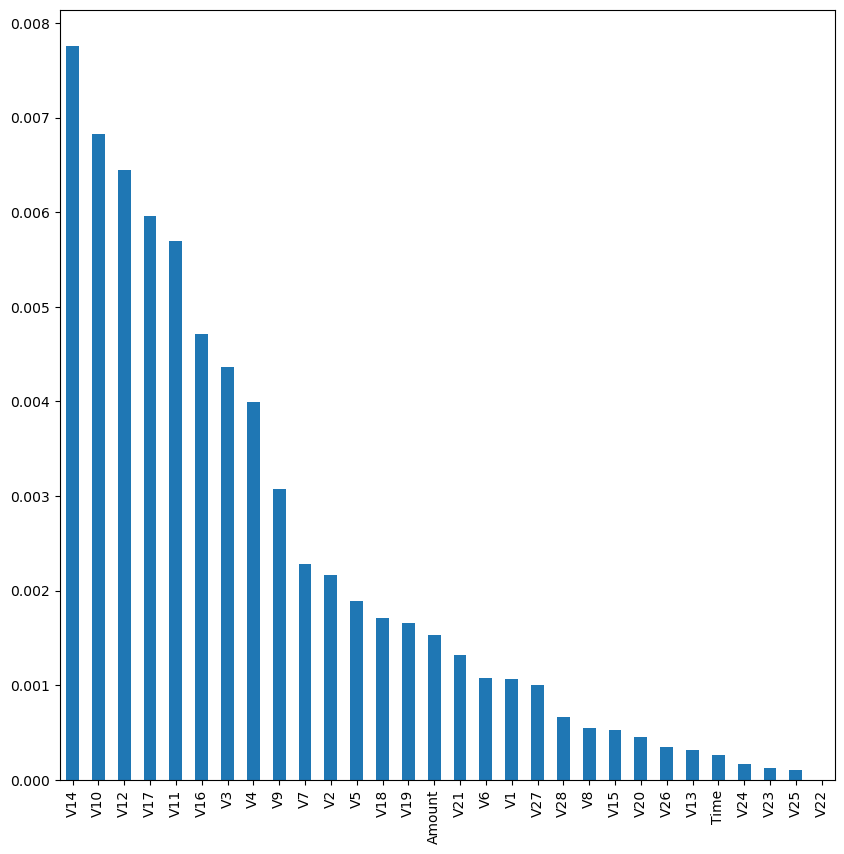

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,10))

In [11]:
from sklearn.feature_selection import SelectKBest
top_10 = SelectKBest(mutual_info_classif, k=10)
top_10.fit(x_train,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x000002268C3A2940>)

In [12]:
top_10

SelectKBest(score_func=<function mutual_info_classif at 0x000002268C3A2940>)

In [13]:
x_train.columns[top_10.get_support()]

Index(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')